<a href="https://colab.research.google.com/github/JJSOLAS/PRELIMSREPO/blob/main/PrelimRqrmnts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install -Uqq fastbook

In [22]:
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
from pathlib import Path

In [23]:
key = os.environ.get('AZURE_SEARCH_KEY', 'c769cff323d34e6fb2364b32cd80d08c')

In [28]:
farmanimals = 'horse','pig','chicken', 'cow', 'dog'
path = Path('farmanimals')

if not path.exists():
    path.mkdir()
    for o in farmanimals:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} pictures')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [29]:
fns = get_image_files(path)

In [30]:
failed = verify_images(fns)
failed.map(Path.unlink);

In [31]:
farmanimals = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=1),
    get_y=parent_label,
    item_tfms=Resize(128))
    
dls = farmanimals.dataloaders(path)

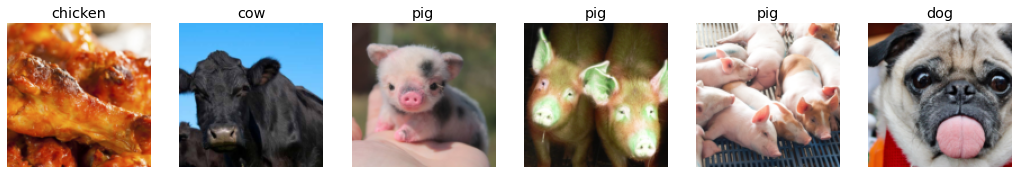

In [32]:
dls.valid.show_batch(max_n=6, nrows=1)

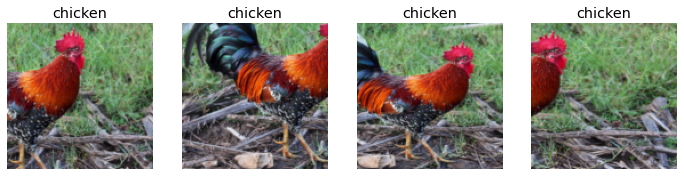

In [33]:
farmanimals = farmanimals.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = farmanimals.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

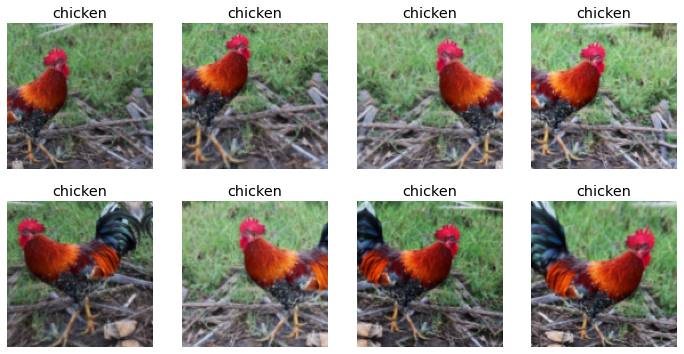

In [35]:
farmanimals = farmanimals.new(item_tfms=Resize(128), batch_tfms=aug_transforms())
dls = farmanimals.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [36]:
farmanimals = farmanimals.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = farmanimals.dataloaders(path)

In [38]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


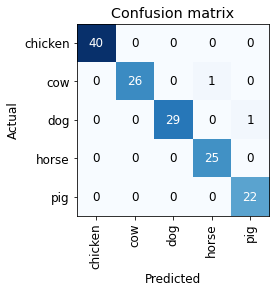

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

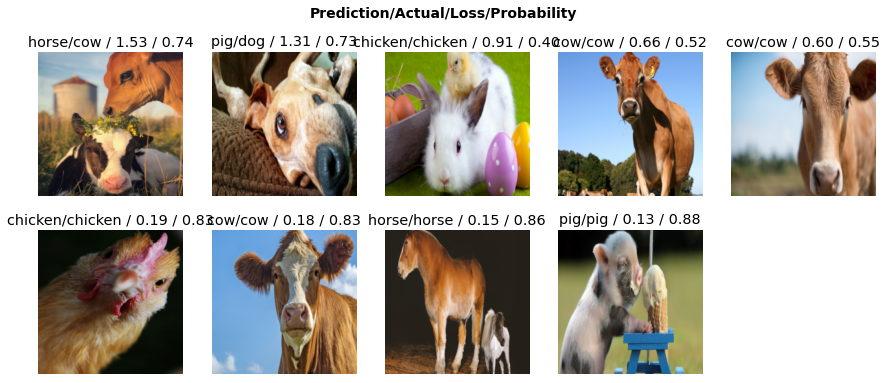

In [40]:
interp.plot_top_losses(10, nrows=2)

In [41]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [42]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [46]:
learn.export('farmanimals.pkl')

In [45]:
path = Path()
learn_inf = load_learner(path/'farmanimals.pkl')

In [47]:
learn_inf.dls.vocab

['chicken', 'cow', 'dog', 'horse', 'pig']

In [48]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [50]:
img = PILImage.create(btn_upload.data[-1])

In [53]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [51]:
pred,pred_idx,probs = learn_inf.predict(img)

In [52]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: cow; Probability: 0.8159')